In [1]:
from dpm.transforms import Transform, InverseTransform, Radial, Planar, Identity
from dpm.distributions import Normal, Uniform, TransformDistribution
from dpm.criterion import cross_entropy
from dpm.train import train
from dpm.visualize import plot_contour, plot_hist, plot_stats
from dpm.utils import integrate
import torch

In [2]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [Radial(2)
                               for _ in range(32)])



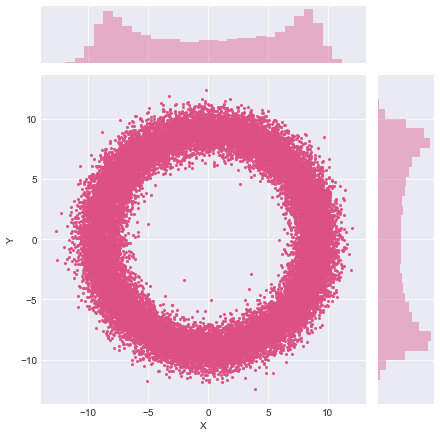

In [3]:
samples = model.sample(30000).detach()
plot_hist(samples)
# plot_contour(model, rng=(-2, 2))

In [4]:
# integrate(model, rng=(-1, 1), n_points=1000000)

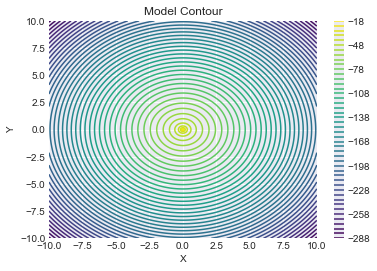

In [5]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Radial(2))
                               for _ in range(32)])


plot_contour(model, rng=(-10, 10))

In [6]:
from dpm.train import train
from dpm.criterion import cross_entropy
from dpm.distributions import Data

In [7]:
p = Data(samples)

In [ ]:
stats = train(p, model, cross_entropy, epochs=2000, log_interval=100, track_parameters=False)

[Epoch 0/2000]	Loss 174.13
[Epoch 100/2000]	Loss 6.88
[Epoch 200/2000]	Loss 5.37
[Epoch 300/2000]	Loss 5.32


In [ ]:
plot_stats(stats)

In [ ]:
plot_contour(model, rng=(-10, 10))

In [ ]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Planar(2))
                               for _ in range(4)])



In [ ]:
stats = train(p, model, cross_entropy, epochs=1, log_interval=100, track_parameters=False)

In [ ]:
plot_contour(model, rng=(-10, 10))

In [ ]:
plot_stats(stats)

In [ ]:
plot_contour(model, rng=(-10, 10))